In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
K = len(set(y_train))
K

10

In [4]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0,2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)
model = Model(i,x)

In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs = 12)

Epoch 1/12
1563/1563 [==============================] - 19s 5ms/step - loss: 1.4829 - accuracy: 0.4628 - val_loss: 1.2456 - val_accuracy: 0.5539
Epoch 2/12
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1305 - accuracy: 0.5984 - val_loss: 1.0742 - val_accuracy: 0.6212
Epoch 3/12
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9453 - accuracy: 0.6646 - val_loss: 0.9827 - val_accuracy: 0.6597
Epoch 4/12
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8100 - accuracy: 0.7145 - val_loss: 0.9364 - val_accuracy: 0.6765
Epoch 5/12
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6879 - accuracy: 0.7560 - val_loss: 0.9744 - val_accuracy: 0.6657
Epoch 6/12
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5856 - accuracy: 0.7923 - val_loss: 0.9457 - val_accuracy: 0.6914
Epoch 7/12
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4844 - accuracy: 0.8271 - val_loss: 1.0246 - val_accuracy

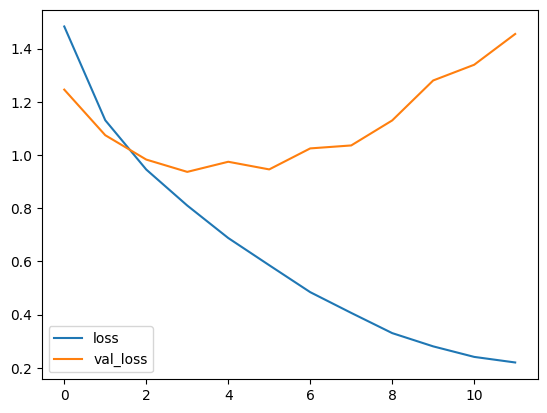

In [7]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

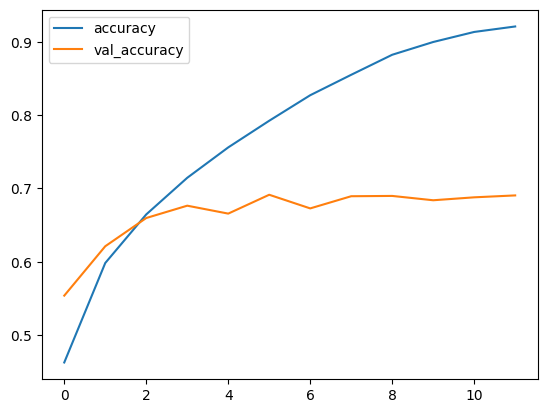

In [8]:
plt.plot(r.history['accuracy'], label = "accuracy")
plt.plot(r.history['val_accuracy'], label = "val_accuracy")
plt.legend()